In [1]:
#math and linear algebra stuff
import numpy as np
import numpy.linalg as la

#plots
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 15.0)
#mpl.rc('text', usetex = True)
import matplotlib.pyplot as plt
%matplotlib inline

# Estimating ellipsoid from data

This notebook intends to presents a few simple ways to find the n-dimensional ellipsoid or the n-dimensional gaussian that best fit a set of data points.

## Introduction : from balls to ellipsoid

Ellipsoid are funny mathematical objects, more precisely, they are geometrical constructions in euclidean spaces like $\mathbb{R}^n$ that are closely related to symmetric matrices and quadratic forms.

Most of people know about the concept of euclidean ball, or sphere, which can easily be extended in n-dimensions as $l_2$-ball or hypersphere, whose later definition is, in $ \mathbb{R}^n$:
$$
    x \in \mathbb{R}^n \; \text{ such that} \; \sqrt{ \sum_{i=0}^{n-1} x_i^2 } = r
$$
Where $r\geq 0$ is called the radius.<br>
We can recognize the definition of the $l_2$ norm in this expression, and directly write:
$$
    x \in \mathbb{R}^n \; \text{ such that} \; \|x\|_2 = r
$$

(-1.0, 1.0, -1.0, 1.0)

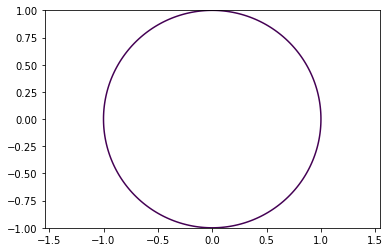

In [2]:
x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x,y)

#Let's draw a circle of equation \sqrt{X^2 + Y^2} -1 = 0
C = np.sqrt(X**2 + Y**2) - 1
plt.contour(X,Y,C,[0])
plt.axis('equal')

One can now generalize the concept of distance in euclidean space, through Hilbert spaces in finite dimension using specific definition of inner product.

For instance, we can rewrite the norm $\|\|_2$ as $\|\|_{M_I}$ where $M_I$ is the identity matrix of size $n\times n$:
$$
M_I =
\begin{pmatrix}
    1 & 0 & \dots & 0\\
    0 & 1 & \ddots & \vdots\\
    \vdots & \ddots & \ddots & 0 \\
    0 & \dots & 0 & 1
\end{pmatrix}
$$

Using this notation, $\|x\|_{M_I}$ can be computed as $\sqrt{x^{\intercal} M_I x}$

One can scale the diagonal elements of $M_I$ so that overall norm will grow faster for some coordinates, in this case, the corresponding ball will be more constrained in that direction, let's take a simple 2D example:

$$
M_{aniso} =
\begin{pmatrix}
    1 & 0\\
    0 & 4
\end{pmatrix}
$$

Which give the following ball equation:
\begin{align*}
    \sqrt{x^{\intercal} M_{aniso} x} = 1\\
    \sqrt{x_1^2 + 4 x_2^2} -1 = 0
\end{align*}

Where of course, the length of the semi-axis will be $\frac{1}{\sqrt{1}}=1$ along $x_1$ (when $x_2=0$) and $\frac{1}{\sqrt{4}}=\frac{1}{2}$ along $x_2$ (when $x_1 = 0$)

(-1.0, 1.0, -1.0, 1.0)

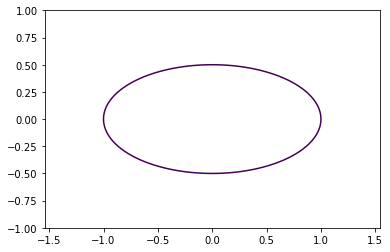

In [3]:
#Let's draw an axis aligned ellipsis of equation \sqrt{x^t Maniso x} -1 = 0

#Define Maniso, then linearize the meshgrid for matrix-vector product
Maniso = np.array([[1,0],[0,4]])
xvec = [np.reshape(X,X.size),np.reshape(Y,Y.size)]

#plot contour of \sqrt{x^t Maniso x} -1 = 0
test=np.dot(Maniso,xvec)
E=np.sqrt(np.sum(test*xvec,0))-1

plt.contour(X,Y,np.reshape(E,X.shape),[0])
plt.axis('equal')

## Positive semi-definite matrix
Nice, the ellipsis is indeed more constrained along the $y$ direction. But what about the $M$ matrix that defines the self dot poduct used in the norm calculation ? Can we choose it randomly ?

Of course not, $M$ should be positive semi definite (PSD), so that the square root can be applied to the result of $x^{\intercal}Mx \succeq 0$. Unfortunately, positive semi definite is a rather abstract definition for a matrix, some even call it a convex cone which is even more abstract.

There are numerous example of PSD matrices:
- symmetric dyads $uu^{\intercal}$, PSD is easily provable because $x^{\intercal}uu^{\intercal}x = (u^{\intercal}x)^2 \geq 0$
- self product of matrix $M^{\intercal}M$, PSD i given by $x^{\intercal}M^{\intercal}Mx = (Mx)^2 \geq 0$
- Covariance matrix
- Gram matrix
- Laplacian matrix of a graph, see the notebook about Spectral gaph theory
- ...

Although not all PSD matrices are symmetric, all matrices cited here are symmetric and PSD, and in general symmetric matrices are PSD, and can be diagonalized in an orthonormal basis, whose matrix is called orthonormal aka unitary, aka rotation matrix.

This last assertion (that can be easily proven TODO) is very important, because it means geometrically that every symmetric matrix, can be expressed as an axis aligned dilation in a given rotated basis.

See for instance this simple 2D example that uses the previous dilation, and a rotation matrix $M_{rot}$ by angle $\theta = \frac{\pi}{8}$ :
$$
M_{rot} =
\begin{pmatrix}
    cos(\theta) & -sin(\theta)\\
    sin(\theta) & cos(\theta)
\end{pmatrix}
$$
In order to generate a PSD of the form:
\begin{align*}
    M_{anisorot} &= M_{rot} M_{aniso} M_{rot}^{\intercal} \\
    &= \begin{pmatrix}
            cos(\theta) & -sin(\theta)\\
            sin(\theta) & cos(\theta)
        \end{pmatrix}
        \begin{pmatrix}
            1 & 0\\
            0 & 4
        \end{pmatrix}
        \begin{pmatrix}
            cos(\theta) & sin(\theta)\\
            -sin(\theta) & cos(\theta)
        \end{pmatrix}
\end{align*}

(-1.0, 1.0, -1.0, 1.0)

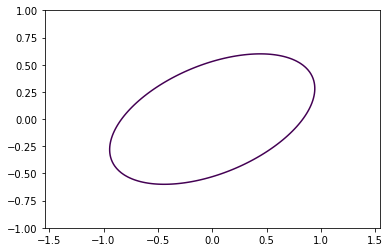

In [4]:
#define the rotation matrix:
theta = np.pi/8.

def GetRotMat( theta ):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
Mrot = GetRotMat( theta )

#compute the rotation/dilation/inverse rotation matrix Manisorot = Mrot Maniso Mrot^t
Manisorot = np.dot(Maniso,Mrot.T)
Manisorot = np.dot(Mrot,Manisorot)

#plot contour of \sqrt{x^t Manisorot x} -1 = 0
test=np.dot(Manisorot,xvec)
E=np.sqrt(np.sum(test*xvec,0))-1

plt.contour(X,Y,np.reshape(E,X.shape),[0])
plt.axis('equal')

### Quadratic form

The matrix definition of an ellipsoid : $x^{\intercal}Mx$ can obviously be developped, and give a polynomial of degree 2 of the form
$$
\sum_{i=0, j=0}^{n-1, n-1} M_{ij} x_i x_j
$$

This sum has $n^2$ terms, but, as all $M_{ij}$ and $M_{ji}$ terms can be factorized, the underlying quadratic form actually has $\frac{n \times (n-1)}{2}$ terms. Unfortunately, we won't talk much about quadratic forms here.

### Ellipsoid volume

When studying the determinant of a matrix, it is always interesting to see this scalar as the volume of the hyperparallelogram described by the column vector of this matrix.
Determinant somehow describes the volume dilation applied to the unitary hypercube (identity matrix) when multiplied by the matrix.

In the case of the Ellipsoid, the matrix coefficients, describes the force of the $l_2$ norm constraints, and it is actually the inverse of this matrix that caracterize the dilation behaviour.

The inherent volume dilation can then be computed as the determinant of the inverse of the ellipsoid matrix.

We can then write, for an ellipsoid of matrix $M$ in $\mathbb{R}^n$ its volume $V_M$ as the product of the volume of the unit ball in $\mathbb{R}^n$ times $det(M^{-1})$.
First, we recall that the volume $V^n(r)$ of the the $l_2$ ball in $\mathbb{R}^n$ is
$$
    V^n(r) =\frac{\pi^{n/2}r^{n}}{\Gamma \left({\frac{n}{2}}+1\right)}
$$
Which gives
$$
    V_M = \frac{\pi^{n/2}}{\Gamma \left({\frac{n}{2}}+1\right)} \times det(M^{-1})
$$

### Minimizing the ellipsoid volume

Boyd & Vandenberghe showed some interesting results about PSD matrix optimization, in their book "convex optimization". One of the application is related to the log determinant minimization (p92):

We consider $f(X) = log( det( X^{-1}) )$ on $S_n^{++}$ the set of PD matrices, the convex conjugate function is defined as
$$
    f^*(Y) = \underset{X\succ 0}{sup} \quad tr(YX)+log( det(X) )
$$
this results from the fact that $tr(YX)$ is the standard inner product on $S^n$.
The development are beyond the scope of this notebook, but they managed to show that
$$
    f^*(Y) = log(det(-Y)^{-1})
$$

### Minimum covering ellipsoid

Now that we have some theoretical tool, it is easy to derive the so-called minimum covering ellipsoid problem (MCE) or minimum volume enclosing ellipsoid MVEE.

Suppose that we have a set of points $p_i \in \mathbb{R}^n, 0\leq i\leq m-1$, and that we want to find the ellipsoid M, centered in $c$, such that all $p_i$ are enclosed in $M$.<br>
This problem can easily be written as:

\begin{align*}
    \text{minimize} \quad & f_0(X) = log( det(M^{-1}))\\
    \text{subject to} \quad & (p_i-c)^{\intercal}M(p_i-c) \leq 1, \quad i=0,...,m-1
\end{align*}

Khachiyan designed an algorithm to find the solution of this optimization problem, we reproduced hereafter

In [5]:
def mvee(points, tol = 0.001):
    """
    Find the minimum volume ellipse.
    Return A, c where the equation for the ellipse given in "center form" is
    (x-c).T * A * (x-c) = 1
    """
    points = np.asmatrix(points)
    N, d = points.shape
    Q = np.column_stack((points, np.ones(N))).T
    err = tol+1.0
    u = np.ones(N)/N
    while err > tol:
        # assert u.sum() == 1 # invariant
        X = Q * np.diag(u) * Q.T
        M = np.diag(Q.T * la.inv(X) * Q)
        jdx = np.argmax(M)
        step_size = (M[jdx]-d-1.0)/((d+1)*(M[jdx]-1.0))
        new_u = (1-step_size)*u
        new_u[jdx] += step_size
        err = la.norm(new_u-u)
        u = new_u
    c = u*points
    A = la.inv(points.T*np.diag(u)*points - c.T*c)/d    
    return np.asarray(A), np.squeeze(np.asarray(c))

(-0.643539489123099,
 5.1429598096653315,
 0.13012487017294116,
 3.9825176974451466)

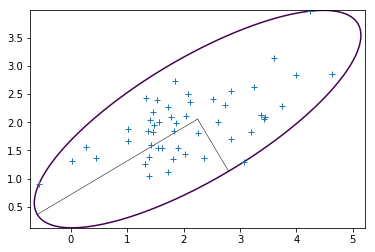

In [6]:
#We will choose some random gaussian distributed 2D points
NB_POINTS = 50
P = np.random.multivariate_normal([2,2],la.inv(Manisorot),NB_POINTS)

#Solve MVEE
A,c = mvee(P, tol = 1e-3)
c=c.reshape((2,1))

#define a new grid
e,v = la.eig(A)
idx = e.argsort()[::-1] #sort values from highest to lowest

#longest and shortest semi axis
e=1/np.sqrt(e)
a=e[idx[0]]
b=e[idx[1]]

#consider largest axe - associated with first eigenvalue
angle = np.arctan2(v[1,idx[0]],v[0,idx[0]])

#plot semi axes
plt.plot([c[0],c[0]+a*v[0,idx[0]]],[c[1],c[1]+a*v[1,idx[0]]], 'k-', lw=0.5)
plt.plot([c[0],c[0]+b*v[0,idx[1]]],[c[1],c[1]+b*v[1,idx[1]]], 'k-', lw=0.5)

#Compute AABB - X
maxT1=np.arctan(-(b/a)*np.tan(angle))
maxT2=maxT1+np.pi
val1=a*np.cos(angle)*np.cos(maxT1)-b*np.sin(angle)*np.sin(maxT1)
val2=a*np.cos(angle)*np.cos(maxT2)-b*np.sin(angle)*np.sin(maxT2)
minX = np.minimum(val1,val2)+c[0]
maxX = np.maximum(val1,val2)+c[0]
#Compute AABB - Y
maxT1=np.arctan(b/(a*np.tan(angle)))
maxT2=maxT1+np.pi
val1=a*np.sin(angle)*np.cos(maxT1)+b*np.cos(angle)*np.sin(maxT1)
val2=a*np.sin(angle)*np.cos(maxT2)+b*np.cos(angle)*np.sin(maxT2)
minY = np.minimum(val1,val2)+c[1]
maxY = np.maximum(val1,val2)+c[1]

#Generate meshgrid over AABB
x = np.linspace(minX, maxX, 100)
y = np.linspace(minY, maxY, 100)
X, Y = np.meshgrid(x,y)
xvec = np.array([np.reshape(X,X.size),np.reshape(Y,Y.size)])

#plot contour of \sqrt{(p-c)^t A (p-c)} -1 = 0
test=np.dot(A,xvec-c)
E=np.sqrt(np.sum(test*(xvec-c),0))-1

plt.plot(P[:,0],P[:,1], '+')
plt.contour(X,Y,np.reshape(E,X.shape),[0])
plt.axis('equal')

### Multivariate gaussian distribution and soft ellipsoid

#### One dimensional case

The moment estimate method is very well known in statistic, to perform statistical distribution parameter estimation. And of course, in many complex process, or large scale problems, central-limit theorem tells us that sums of probability distribution tends to the normal law:

$$
    pdf(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

This is why one dimensional gaussian distribution parameter distribution is easily performed every day, using order 1 estimator (mean) for $k$ discrete sample data points:
$$
    \bar{x} = \sum_{i=0}^{k-1} \frac{1}{k} x_i
$$

Although there is always a debate between biased and unbiased estimator of the variance (order 2 moment) of a discrete distribution, we choose the biased one $v$, because of its behaviour when a few samples are availables:
$$
    v = \sum_{i=0}^{k-1} \frac{1}{k} (x_i-\bar{x})^2
$$

#### Multi-dimensional case

The normal distribution can pleasantly be extended to the n-dimensional case as follows:
$$
    pdf(x) = \frac{1}{\sqrt{(2\pi)^n det(\Sigma)}} e^{-\frac{1}{2} (x-\mu)^{\intercal}\Sigma^{-1}(x-\mu)}
$$
Where of course, $\Sigma$, the covariance matrix, is PSD. It is interesting to notice that the term $(x-\mu)^{\intercal}\Sigma^{-1}(x-\mu)$ is equivalent to the square of the Mahalanobis distance.

The intuition behind this scheme is that, when sampled from a random experiment, the variables, (or the linear combination of variables that defines a direction) that tends to have a high variability will have strong coefficients in the diagonalized version of the covariance matrice.

As seen earlier, the semi axis of the ellipsoid in a given direction will be equal to the inverse of the squared root of the diagonal term in the corresponding position in the diagonalized matrix.
This is why strong coefficient in the covariance matrix will generate weak coefficients in the inverse covariance matrix, hence large semi axis in the geometrical ellipsoid.

PDF should sum to 1: 389.118813857


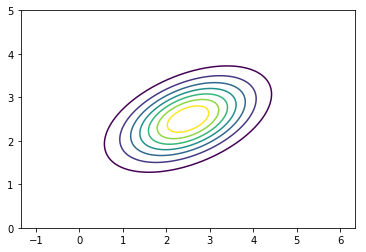

In [9]:
#Here is an example of a 2D gaussian distribution

#Generate predefined meshgrid
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x,y)
xvec = np.array([np.reshape(X,X.size),np.reshape(Y,Y.size)])

Sigma = la.inv(Manisorot)
mu = np.array([2.5,2.5]).reshape(2,1)
coef = 1/np.sqrt(np.power(2*np.pi,2)*la.det(Sigma))

#plot contour of 2-dimensional gaussian pdf
test=np.dot(la.inv(Sigma),xvec-mu)
Egauss=coef * np.exp(-0.5* np.sum(test*(xvec-mu),0))

plt.contour(X,Y,np.reshape(Egauss,X.shape))
plt.axis('equal')

#distribution should sum to 1
print("PDF should sum to 1: "+str(Egauss.sum()))

### Estimating one or muliple multidimensional gaussian distribution parameters

The moment estimatation method we talked about previously can easily be used to estimate the parameters $\mu,\Sigma$ of a gaussian distribution.

We just have to define it for $k$ sample $x_i \in \mathbb{R}^n$ points in a n-dimensional world:
$$
    \mu = \sum_{i=0}^{k-1} \frac{1}{k} x_i
$$

And the covariance matrix $\Sigma$ is estimated from $X$, the matrix whose $i^{th}$ column is $x_i-\mu$
$$
    \Sigma = \frac{1}{k} X X^{\intercal}
$$

(0.0, 5.0, 0.0, 5.0)

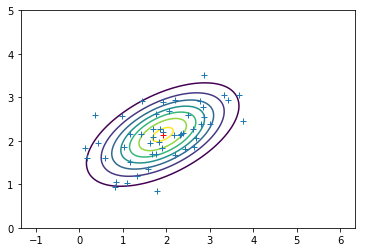

In [10]:
#Here is an example of a 2D gaussian distribution
k = 50
X = np.random.multivariate_normal([2,2],Sigma,k).T
plt.plot(X[0,:],X[1,:], '+')

#Estimate mu
muEst = (X.sum(1)/k).reshape(2,1)
plt.plot(muEst[0],muEst[1], 'r+')

#Estimate Sigma
Xcent=X-muEst
SigmaEst = np.dot(Xcent,Xcent.T)/k

#Generate predefined meshgrid
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
Xax, Yax = np.meshgrid(x,y)
xvec = np.array([np.reshape(Xax,Xax.size),np.reshape(Yax,Yax.size)])

#plot contour of 2-dimensional gaussian pdf
coef = 1/np.sqrt(np.power(2*np.pi,2)*la.det(SigmaEst))
test=np.dot(la.inv(SigmaEst),xvec-muEst)
EgaussEst=coef * np.exp(-0.5* np.sum(test*(xvec-muEst),0))

plt.contour(Xax,Yax,np.reshape(EgaussEst,Xax.shape))
plt.axis('equal')

## Estimate centroids and FWHM for astronomical imaging

As a simple example of usefulness of ellipsoid estimation, we are going to use the previous example on an astronomical usecase: the dataset stands for a 2d diffraction image of a star discretized over a 2d regular grid of pixels.



It can be proved that this moment estimate method gives the maximum likelihood solution of the parameters given the dataset.

### Multiple gaussian distribution and the EM algorithm

It is interesting to know that, we can extended this moment estimate method to multipled distribution estimation in order to perform "smooth clustering".

This is actually the most simple instance of the expectation maximization algorithm, previously seen in the InformationTheoryOptimization notebook.

Here, the expectation step consist in applying our moment estimate method independantly over each cluster of data.
Then the maximization part amounts to assign our sample to the distribution that maximizes its own probability.

This variant of the k-mean algorithm unfortunately suffer from the very same drawback, it is extremly sensitive to initialization, and balance in the size of the cluster.

/opt/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


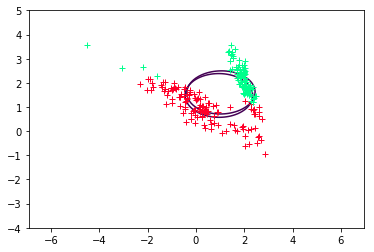

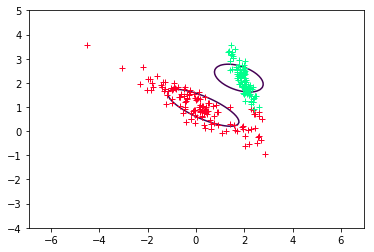

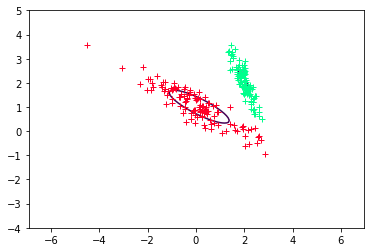

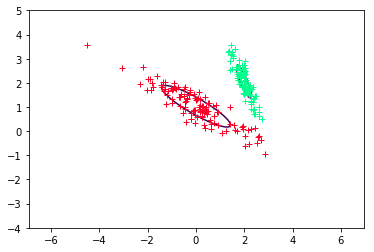

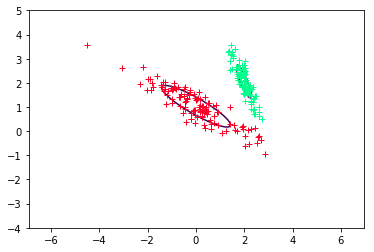

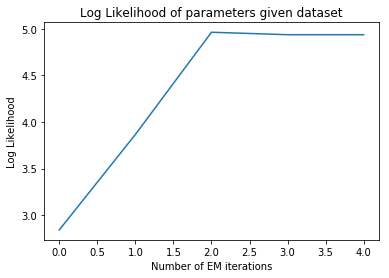

In [16]:
import random as rnd

#Let's try this EM instance
Sigma1 = np.dot(GetRotMat(np.pi/8),np.dot(np.diag([0.02,0.5]),GetRotMat(np.pi/8).T))
Sigma2 = np.dot(GetRotMat(np.pi/3),np.dot(np.diag([0.08,2]),GetRotMat(np.pi/3).T))

#generate 2 random instances
k = 250
# 2d distribution = rnd(mean,covariance,nbSamples)
X = np.random.multivariate_normal([2,2],Sigma1,(k+1)//2)
Y = np.random.multivariate_normal([0,1],Sigma2,k//2)
X=np.concatenate((X,Y),axis=0)
np.random.shuffle(X)
X=X.T

#Generate predefined meshgrid
minAx=-4
maxAx=5
x = np.linspace(minAx, maxAx, 100)
y = np.linspace(minAx, maxAx, 100)
Xax, Yax = np.meshgrid(x,y)
xvec = np.array([np.reshape(Xax,Xax.size),np.reshape(Yax,Yax.size)])

#Now Initialize n clusters, here n=2
nclusters=2
clusters = []
for i in range(nclusters):
    clusters.append({})
belonging = np.random.randint(0,nclusters,k)
likeMap = np.zeros((k,nclusters))

#EM algorithm
nb_iter = 5
loglikelihood = []

for iter in range(nb_iter):
    #Expectation
    for i in range(nclusters):
        belongs = belonging==i
        #print "belongs for cluster "+str(i)+" = "+str(belongs)
        ki=np.count_nonzero(belongs)
        Xi = X[:,belongs]
        mu = (Xi.sum(1)/ki).reshape(2,1)
        clusters[i]['mu'] = mu
        XiCent = Xi-mu
        clusters[i]['Sigma'] = np.dot(XiCent,XiCent.T)/ki

    #Maximization
    for idx,cl in enumerate(clusters):
        coef = 1/np.sqrt(np.power(2*np.pi,2)*la.det(cl['Sigma']))
        test=np.dot(la.inv(cl['Sigma']),X-cl['mu'])
        likeMap[:,idx]=coef * np.exp(-0.5* np.sum(test*(X-cl['mu']),0))
        belonging=np.argmax(likeMap,1)
    
    #total likelihood
    loglikelihood.append(np.log(likeMap[range(len(belonging)),belonging].sum()))
    
    #Check that no cluster stole all the elements
    for idx,cl in enumerate(clusters):
        minNbElem = np.maximum(2,k/(nclusters*3))
        if np.count_nonzero(belonging==idx)<minNbElem:
            print("Clustering restart, because population went under "+\
                str(100./(nclusters*3.))+"% of the dataset")
            #Steal the farthest point in the biggest cluster
            bigClIdx = np.bincount(belonging).argmax()
            belonging[ likeMap[:,bigClIdx].argsort()[:minNbElem]]=idx

    cm = plt.get_cmap('gist_rainbow')
    colors = [cm(1.*i/len(clusters)) for i in range(len(clusters))]

    #plot clustering results
    for idx,cl in enumerate(clusters):
        belongs = belonging==idx

        plt.figure(iter)
        #plot points with specific color
        plt.plot(X[0,belongs],X[1,belongs], '+', color=colors[idx])

        #plot contour
        sig = cl['Sigma']
        mu = cl['mu']
        coef = 1/np.sqrt(np.power(2*np.pi,2)*la.det(sig))
        test=np.dot(la.inv(sig),xvec-mu)
        Ei=coef * np.exp(-0.5* np.sum(test*(xvec-mu),0))
        plt.contour(Xax,Yax,np.reshape(Ei,Xax.shape),1,color=colors[idx])
        plt.axis('equal')

plt.figure(iter+1)
plt.title( "Log Likelihood of parameters given dataset")
plt.xlabel('Number of EM iterations')
plt.ylabel('Log Likelihood')
plt.plot(range(nb_iter),loglikelihood)